In [196]:
%matplotlib inline
import matplotlib.pyplot as plt
import mxnet as mx
import numpy as np
import pandas as pd

In [140]:
symbol, arg_params, aux_params = mx.model.load_checkpoint('/media/jakob/bigdata/models/mxnet/model/Inception-7',1)

continue_model = mx.model.FeedForward(ctx=mx.cpu(), aux_params=aux_params, symbol=symbol, arg_params=arg_params )

# continue_model.fit()

In [212]:
import numpy as np
from skimage import io, transform

def PreprocessImage(path, show_img=False):
    # load image
    img = io.imread(path)
    print("Original Image Shape: ", img.shape)
    # we crop image from center
    short_egde = min(img.shape[:2])
    yy = int((img.shape[0] - short_egde) / 2)
    xx = int((img.shape[1] - short_egde) / 2)
    crop_img = img[yy : yy + short_egde, xx : xx + short_egde]
    # resize to 299, 299
    resized_img = transform.resize(crop_img, (299, 299))
    if show_img:
        io.imshow(resized_img)
    # convert to numpy.ndarray
    sample = np.asarray(resized_img) * 256
    # swap axes to make image from (299, 299, 3) to (3, 299, 299)
    sample = np.swapaxes(sample, 0, 2)
    sample = np.swapaxes(sample, 1, 2)
    # sub mean
    normed_img = sample - 128.
    normed_img /= 128.

    return np.reshape(normed_img, (1, 3, 299, 299)), img

In [193]:
import scipy.misc as sm

In [214]:
paths = ['/home/jakob/git/vir-2016/CBIR_Projekt/images/WebImages_71x6/beach_3.jpg',
'/home/jakob/git/vir-2016/CBIR_Projekt/images/WebImages_71x6/chimp_4.jpg',
'/home/jakob/Downloads/cropped_panda.jpg',
'/home/jakob/Downloads/grace_hopper.jpg',
'/home/jakob/Downloads/fox.jpg']

X_data = []
X_img = []
for path in paths:
    proc, img = PreprocessImage(path)
    X_data.append(proc)
    X_img.append(img)
X = np.concatenate(X_data)
X.shape
Y = continue_model.predict(X)

('Original Image Shape: ', (119, 160, 3))
('Original Image Shape: ', (120, 160, 3))
('Original Image Shape: ', (100, 100, 3))
('Original Image Shape: ', (606, 517, 3))
('Original Image Shape: ', (364, 500, 3))


In [189]:
with open('/media/jakob/bigdata/models/mxnet/model/synset.txt') as fi:
    classes = fi.readlines()
len(classes)

1001

In [186]:
len(Y[idx][:-8])

1000

In [170]:
[1,2,3,4,5][-2:]

[4, 5]

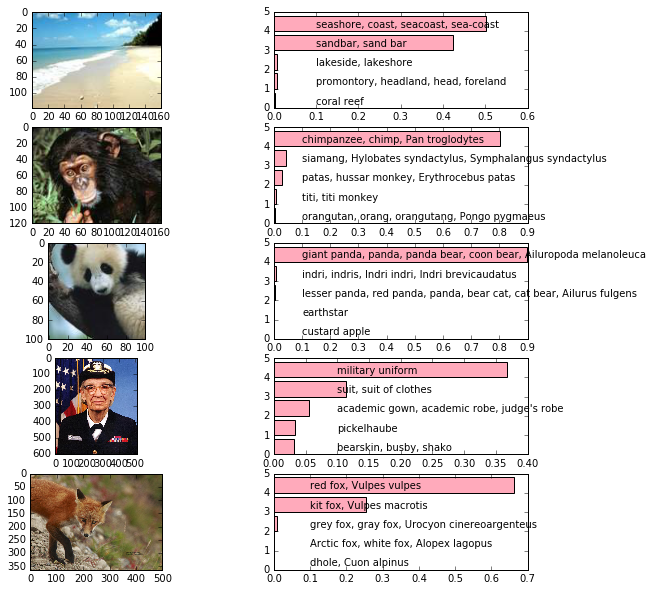

In [233]:
text = np.array(classes)
plt_n = 0
for idx in range(len(Y)):
    
    idx_sort = np.argsort(Y[idx][:-7])
    class_name = [classes[i] for i in idx_sort][-5:]
    class_val  = [Y[idx][i] for i in idx_sort][-5:]
    result = zip(class_val, class_name)
    plt_n = plt_n + 1
    plt.subplot(len(Y), 2,plt_n)
    plt.imshow(X_img[idx])
    plt_n = plt_n + 1
    ax = plt.subplot(len(Y),2, plt_n)
    plt.barh(range(len(Y)), class_val,color='#FFAABB')
    for i, text in enumerate(class_name):
        ax.text(0.1,i - 0.4, class_name[i][10:])
# plt.imshow(np.swapaxes(img,0,2))
# plt.tight_layout()
fig = plt.gcf()
fig.set_size_inches(10, 10)